# **Тестовое задание**

# Содержание

* [Часть 1. Подготовка](#part1)
* [Часть 2. Лист N1 Задание формулы](#part2)
* [Часть 3. Лист N2 Задание сводные таблицы](#part3)
* [Часть 4. Лист N3 Power Querry](#part4)
* [Часть 5. Результат](#part5)

# Часть 1. Подготовка <a class="anchor" id="part1"></a>

In [1]:
# Импорт библиотек
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

In [2]:
# Импорт датасета
df = pd.read_excel('data.xlsx')
df.head()

,Дата,Продукт,Продажи,Цена,Идентификация
0,2022-01-01 00:00:00,Яблоко,39.0,8,NaN
1,2022-01-01 00:00:00,Апельсин,3.0,7,NaN
2,2022-01-01 00:00:00,Авокадо,19.0,15,NaN
3,2022-01-01 00:00:00,Арбуз,35.0,20,NaN
4,2022-01-01 00:00:00,Авокадо,36.0,15,NaN


In [3]:
# Проверка наличия null значений, тип данных столбцов и количества строк/столбоцов в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Дата           730 non-null    object 
 1   Продукт        730 non-null    object 
 2   Продажи        730 non-null    float64
 3   Цена           730 non-null    object 
 4   Идентификация  0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 28.7+ KB


In [4]:
# Сначала уберем пустые строки
df.dropna(subset=['Дата'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 730
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Дата           730 non-null    object 
 1   Продукт        730 non-null    object 
 2   Продажи        730 non-null    float64
 3   Цена           730 non-null    object 
 4   Идентификация  0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 34.2+ KB


In [10]:
# Проверим корреткность и унификацию данных в каждом столбце. Назначим корретный тип данных для каждого столбца.

# Столбец Дата
invalid_date_rows = df[~pd.to_datetime(df['Дата'], errors='coerce', dayfirst=True).notna()]
invalid_date_rows
#invalid_date_info = invalid_date_rows[['Дата']].reset_index()
#invalid_date_info.columns = ['Row Index', 'Invalid Date Value']
#invalid_date_info

,Дата,Продукт,Продажи,Цена,Идентификация
153,1601.2022,Апельсин,40.0,7,NaN


In [11]:
# все кейсы - некорректный формат, два кейса - ошибки. Обработаем эти проблемы
df['Дата'].replace('1601.2022', dt.datetime.strptime('16.01.2022', '%d.%m.%Y'), inplace=True)
df['Дата'].replace('  05.02.2022', dt.datetime.strptime('05.02.2022', '%d.%m.%Y'), inplace=True)
df['Дата'].replace('14.02.2022', dt.datetime.strptime('14.02.2022', '%d.%m.%Y'), inplace=True)
df['Дата'].replace('03.03.2022', dt.datetime.strptime('03.03.2022', '%d.%m.%Y'), inplace=True)

In [12]:
# Столбец Продукт
df['Продукт'].unique()

array(['Яблоко', 'Апельсин', 'Авокадо', 'Арбуз', 'Кокос', 'Груша', 'Лук',
       'Виноград', ' Яблоко', 'Яблоко.', 'Лук ', 'Апельси', ' Кокос',
       'Авокад о', ' Авокадо', ' Апельсин', ' Лук', 'Лук3'], dtype=object)

In [13]:
# Исправим все ошибки и уберем лишние пробелы
df['Продукт'].replace('Яблоко.', 'Яблоко', inplace=True)
df['Продукт'].replace('Апельси', 'Апельсин', inplace=True)
df['Продукт'].replace('Авокад о', 'Авокадо', inplace=True)
df['Продукт'].replace('Лук3', 'Лук', inplace=True)
df['Продукт'] = df['Продукт'].str.strip()

In [14]:
# Столбец Цена
invalid_price_rows = df[pd.to_numeric(df['Цена'], errors='coerce').isna()]
invalid_price_info = invalid_price_rows[['Цена']].reset_index()
invalid_price_info.columns = ['Row Index', 'Invalid Price Value']
invalid_price_info    

,Row Index,Invalid Price Value
0,560,10р
1,564,10р
2,637,10р


In [15]:
# исправим ошибку и поставим корректный типа данных
df['Цена'].replace('10р', 10, inplace=True)
df['Цена'] = df['Цена'].astype('float64')

In [16]:
# В итоге красивый и ровный датасет, с котроым можно работать
df.head(20)

,Дата,Продукт,Продажи,Цена,Идентификация
0,2022-01-01,Яблоко,39.0,8.0,NaN
1,2022-01-01,Апельсин,3.0,7.0,NaN
2,2022-01-01,Авокадо,19.0,15.0,NaN
3,2022-01-01,Арбуз,35.0,20.0,NaN
4,2022-01-01,Авокадо,36.0,15.0,NaN
5,2022-01-01,Апельсин,3.0,7.0,NaN
6,2022-01-01,Арбуз,27.0,20.0,NaN
7,2022-01-01,Авокадо,11.0,15.0,NaN
8,2022-01-01,Кокос,37.0,10.0,NaN
9,2022-01-01,Груша,12.0,8.0,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 730
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Дата           730 non-null    datetime64[ns]
 1   Продукт        730 non-null    object        
 2   Продажи        730 non-null    float64       
 3   Цена           730 non-null    float64       
 4   Идентификация  0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 34.2+ KB


# Часть 2. Лист N1 Задание формулы <a class="anchor" id="part2"></a>

In [18]:
# Задача 1: 
# а) построить структурированную таблицу, в которой будет видно количество проданных продуктов 
# за каждый день по каждому виду фруктов/овощей.

# Первая часть немного противоречит остальным пунктам - одновременно же не может быть таблиц по дням и по периоду.
# Сделаем 2 отдельные по дням и полную по периоду.
# Таблица по дням
fruit_table_day = df.groupby([df['Дата'], 'Продукт'])['Продажи'].sum().reset_index()
fruit_table_day

,Дата,Продукт,Продажи
0,2022-01-01,Авокадо,66.0
1,2022-01-01,Апельсин,6.0
2,2022-01-01,Арбуз,62.0
3,2022-01-01,Виноград,10.0
4,2022-01-01,Груша,12.0
...,...,...,...
364,2022-03-07,Апельсин,26.0
365,2022-03-07,Арбуз,40.0
366,2022-03-07,Виноград,28.0
367,2022-03-07,Груша,25.0


In [19]:
# Таблица по периоду
# б) В таблице должна быть группировка по месяцам с возможностью увидеть общий итог по каждому месяцу
# в) Выявить общее количество продаж за весь период по каждому овощу/фрукту.
# г) Найти процент количества продаж каждого вида овоща/фрукта

# сгруппируем наш датасет по месяцу и продукту, и посчитаем сумму продаж
fruit_table = df.groupby([df['Дата'].dt.month, 'Продукт'])['Продажи'].sum().reset_index()

# создадим временный датасет с суммой продаж за период - месяц 
temp = fruit_table.groupby([fruit_table['Дата']]).sum(numeric_only=True)['Продажи']

# конвертируем временный датасет в словарь и импользуем его для заполнения строк с соответствующим перидом
d = temp.to_dict()
fruit_table['Сумма продаж, период'] = fruit_table['Дата'].map(d)

# найдем процент количества продаж каждого вида овоща/фрукта за период
fruit_table['Продажи, доля'] = round((fruit_table['Продажи'] / fruit_table['Сумма продаж, период']) * 100, 2)

# дадим более корреткное название столбцу с периодом
fruit_table.rename(columns={'Дата': 'Период'}, inplace=True)
fruit_table

,Период,Продукт,Продажи,"Сумма продаж, период","Продажи, доля"
0,1,Авокадо,1019.0,6419.0,15.87
1,1,Апельсин,1032.0,6419.0,16.08
2,1,Арбуз,845.0,6419.0,13.16
3,1,Виноград,671.0,6419.0,10.45
4,1,Груша,522.0,6419.0,8.13
5,1,Кокос,882.0,6419.0,13.74
6,1,Лук,707.0,6419.0,11.01
7,1,Яблоко,741.0,6419.0,11.54
8,2,Авокадо,678.0,6574.0,10.31
9,2,Апельсин,675.0,6574.0,10.27


In [20]:
# Задача 3: Сделать аналогичную таблицу, но по сумме выручки.

# в первую очередь добавим сумму выручки по конкретному продукту за день
df['Выручка'] = df['Продажи'] * df['Цена']

# все остальные шаги аналогичны таблице выше только используем столбец Выручка
fruit_table_income = df.groupby([df['Дата'].dt.month, 'Продукт'])['Выручка'].sum().reset_index()
temp2 = fruit_table_income.groupby([fruit_table_income['Дата']]).sum(numeric_only=True)['Выручка']
d2 = temp2.to_dict()
fruit_table_income['Сумма выручки, период'] = fruit_table_income['Дата'].map(d2)
fruit_table_income['Выручка, доля'] = round((fruit_table_income['Выручка'] / fruit_table_income['Сумма выручки, период']) * 100, 2)
fruit_table_income.rename(columns={'Дата': 'Период'}, inplace=True)
fruit_table_income

,Период,Продукт,Выручка,"Сумма выручки, период","Выручка, доля"
0,1,Авокадо,15303.0,67343.0,22.72
1,1,Апельсин,7224.0,67343.0,10.73
2,1,Арбуз,16900.0,67343.0,25.10
3,1,Виноград,6039.0,67343.0,8.97
4,1,Груша,4176.0,67343.0,6.20
5,1,Кокос,8945.0,67343.0,13.28
6,1,Лук,2828.0,67343.0,4.20
7,1,Яблоко,5928.0,67343.0,8.80
8,2,Авокадо,10458.0,67964.0,15.39
9,2,Апельсин,4967.0,67964.0,7.31


In [21]:
# Задача 2: В "массиве данных" есть незаполненная колонка "Идентификация" - заполнить её формулой из таблицы "Описание".

# Для удобства чтения таблицы поменяем местами столбцы Идентификация и Выручка
# создадим функцию замены положения столбцов
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

# проведем замену
df = df_column_switch(df,'Выручка', 'Идентификация')

# импортируем таблицу описания продуктов
df_description = pd.read_excel('description.xlsx')

# создадим на основании таблицы словарь и импользуем его для заполнения строк с соответствующим продуктом
dict_description = dict(df_description.values)
df['Идентификация'] = df['Продукт'].map(dict_description)
df

,Дата,Продукт,Продажи,Цена,Выручка,Идентификация
0,2022-01-01,Яблоко,39.0,8.0,312.0,Фрукт
1,2022-01-01,Апельсин,3.0,7.0,21.0,Фрукт
2,2022-01-01,Авокадо,19.0,15.0,285.0,Овощ
3,2022-01-01,Арбуз,35.0,20.0,700.0,Ягода
4,2022-01-01,Авокадо,36.0,15.0,540.0,Овощ
...,...,...,...,...,...,...
726,2022-03-07,Апельсин,26.0,7.0,182.0,Фрукт
727,2022-03-07,Виноград,28.0,9.0,252.0,Ягода
728,2022-03-07,Арбуз,40.0,20.0,800.0,Ягода
729,2022-03-07,Груша,25.0,8.0,200.0,Фрукт


In [22]:
# Задача 4: Сделать список из продуктов для выбора в смежной ячейке снизу так, чтобы при выборе продукта в этой ячейке, 
# заполнялись значения Описание, Итого продаж, Средняя сумма продаж.

# Для этого задания мы будем использовать датасет fruit_table и словарь dict_description.
# Сначала создадим отельный датасет с интересующими нами параметрами
# суммируем продажи по кадому продукту
summary_table = fruit_table.groupby([fruit_table['Продукт']]).sum(numeric_only=True)['Продажи'].reset_index()

# добавим среднюю сумму продаж
summary_table['Средняя сумма продаж'] = round(summary_table['Продажи']/len(fruit_table['Период'].unique()))

# добавим описание
summary_table['Описание'] = fruit_table['Продукт'].map(dict_description)

# дадим более корреткное название столбцу с продажами
summary_table.rename(columns={'Продажи': 'Итого продаж'}, inplace=True)

# поменяем размещенеи столбцов согласно заданию
columns_titles = ['Продукт', 'Описание', 'Итого продаж', 'Средняя сумма продаж']
summary_table = summary_table.reindex(columns=columns_titles)
summary_table

,Продукт,Описание,Итого продаж,Средняя сумма продаж
0,Авокадо,Овощ,1966.0,655.0
1,Апельсин,Фрукт,1954.0,651.0
2,Арбуз,Ягода,2096.0,699.0
3,Виноград,Ягода,1673.0,558.0
4,Груша,Фрукт,1388.0,463.0
5,Кокос,Орех,2453.0,818.0
6,Лук,Овощ,1850.0,617.0
7,Яблоко,Фрукт,1717.0,572.0


In [23]:
# Далее нам нужна простая функция, при помощи которой мы сможем выбирать интересующий нас продукт и получать по нему данные:
def product_of_interest_func (df, product):
    product = df[df['Продукт']==product]
    product_trans = product.transpose().iloc[1:4].reset_index()
    product_trans.columns = ['Показатель', 'Значение']
    return product_trans

# Проверим нашу функцию на апельсине
product_of_interest_func(summary_table, 'Апельсин')

,Показатель,Значение
0,Описание,Фрукт
1,Итого продаж,1954.0
2,Средняя сумма продаж,651.0


In [24]:
# Задача 5: Посчитать в отдельную ячейку сумму всех продаж продуктов, цена которых лежит в диапазоне от  10 до 15 рублей включительно.

# для этого мы используем условия:
coef = df[(df['Цена']>=10) & (df['Цена']<=15)]['Продажи'].sum()
print("Cумма всех продаж продуктов, цена которых лежит в диапазоне от  10 до 15 рублей включительно, составляет {}".format(coef))

Cумма всех продаж продуктов, цена которых лежит в диапазоне от  10 до 15 рублей включительно, составляет 4095.0


# Часть 3. Лист N2 Задание сводные таблицы <a class="anchor" id="part3"></a>

Исходя из моего понимания задания на первом листе вы хотели бы проверить знания формул, на втором power query. Кажется эта часть задания не актуальна в моем случае.

# Часть 4. Лист N3 Power Querry <a class="anchor" id="part4"></a>

In [25]:
# Задание "Создать диаграмму по дням месяцев с продажами фруктов чтобы выявить максимальные дни продаж.
# Например, если за 03.01.2023 будут проданы: 
# Яблоки
# Мандарины
# Бананы
# то значение этого дня будет число 3 (по числу вида фруктов)"

# В этом задании меня смущает представленный массив на 3 листе Excel. 
# Кажется верным использовать оригинальный массив с первого листа
# Тогда наша задача визуализировать по дням кол-во видов продуктов.
# Для начала получим нужный нам датасет. 
# Так как часто категории дублируются в один и тот же день, используем в подсчете только ункальные значения категорий за каждый день 
viz_df = df.groupby(['Дата'])['Продукт'].nunique().reset_index()
viz_df

,Дата,Продукт
0,2022-01-01,8
1,2022-01-02,6
2,2022-01-03,3
3,2022-01-04,8
4,2022-01-05,6
...,...,...
62,2022-03-04,7
63,2022-03-05,4
64,2022-03-06,8
65,2022-03-07,4


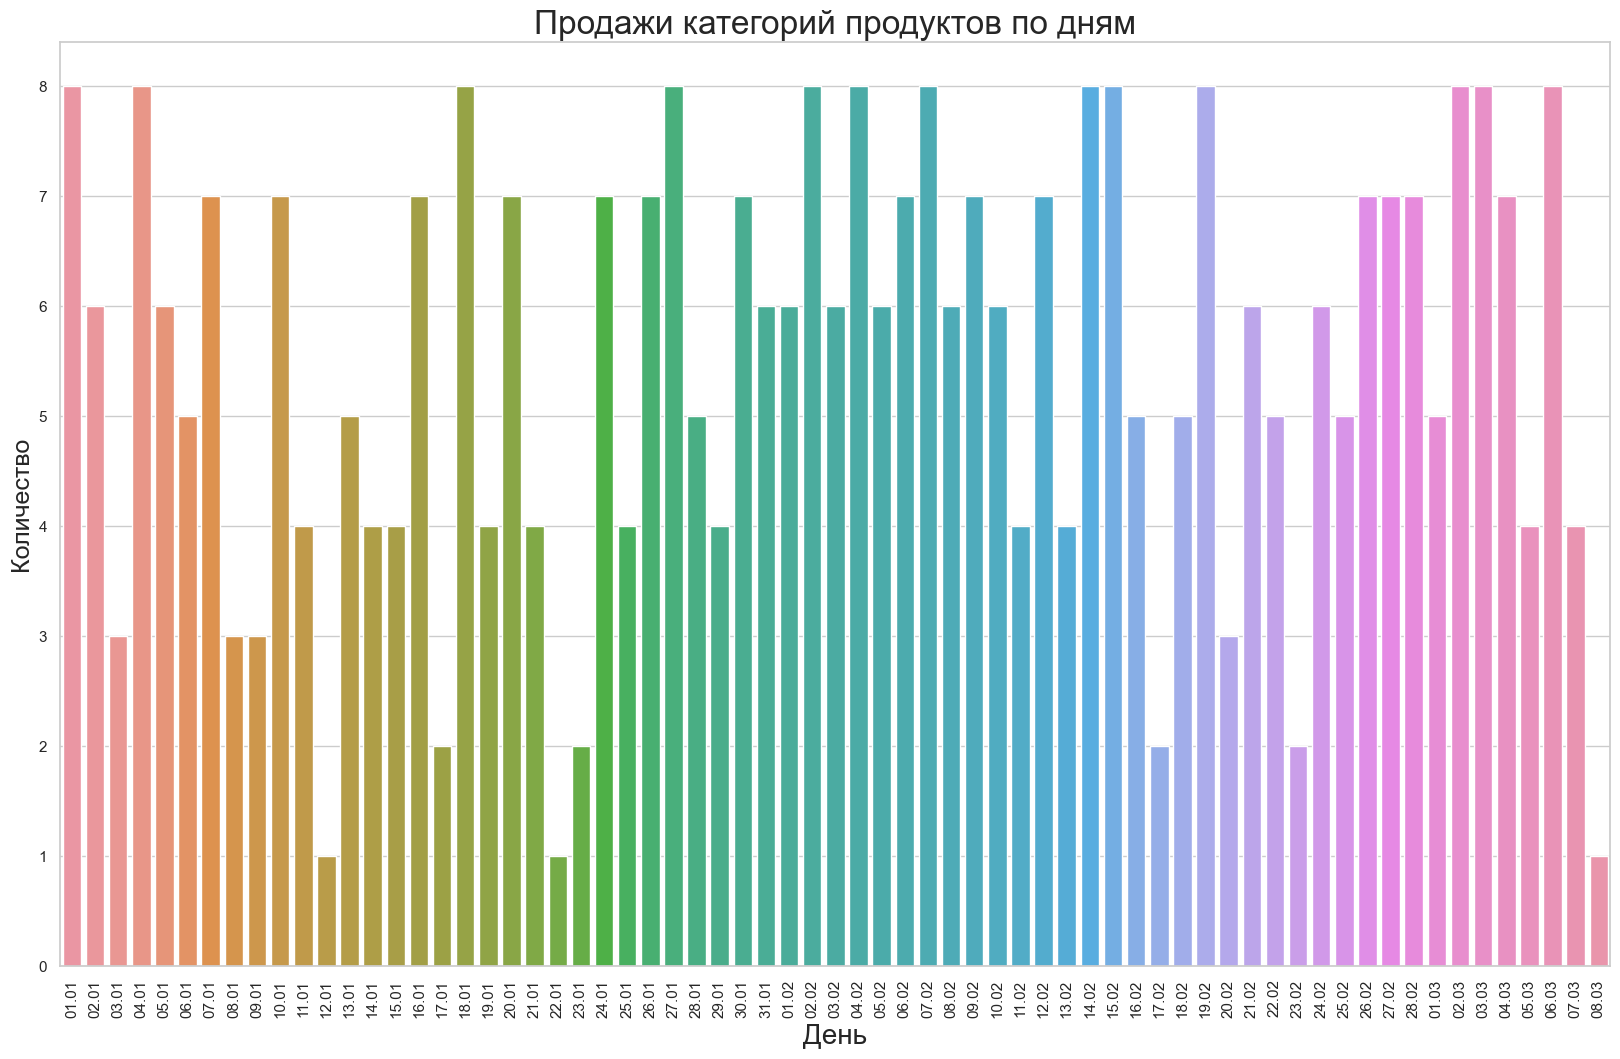

<Figure size 640x480 with 0 Axes>

In [26]:
# Теперь можно визуализировать
sns.set_theme(style="whitegrid")
plt.figure (figsize=(20,12))
ax = plt.subplot (1,1,1)
sns.barplot(data = viz_df, x='Дата', y='Продукт')
myFmt = mdates.DateFormatter('%d.%m')
ax.xaxis.set_major_formatter(myFmt)
plt.xticks(rotation=90)
plt.title('Продажи категорий продуктов по дням', loc='center', size=24)
plt.xlabel('День', size=20)
plt.ylabel('Количество', size=18)
plt.savefig('Диаграмма продаж.jpeg', dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

# Часть 5. Результат <a class="anchor" id="part5"></a>

In [27]:
# Выгрузим все датасеты в отедльные excel таблицы
df.to_excel('общий массив.xlsx')
fruit_table_day.to_excel('таблица продаж по дням.xlsx') 
fruit_table.to_excel('таблица продаж по периодам.xlsx') 
fruit_table_income.to_excel('таблица по выручке.xlsx') 
summary_table.to_excel('сводная таблица.xlsx')